In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()
#SibSp, quantos pessoas o acompanhando
#Ticket, o código do bilhete dele
#Fare, quanto ele pagou pelo bilhete
#Cabin, número da cabine
#Embarked, onde ele embarcou

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

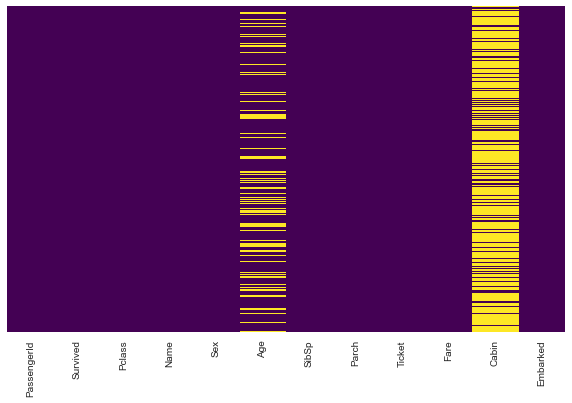

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

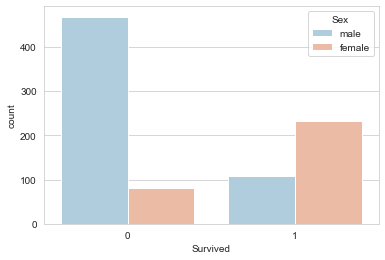

In [21]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

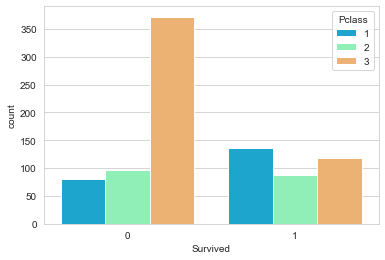

In [23]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

<AxesSubplot:>

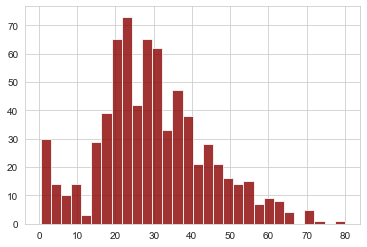

In [28]:
train['Age'].hist(bins=30, color='darkred', alpha=0.8)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

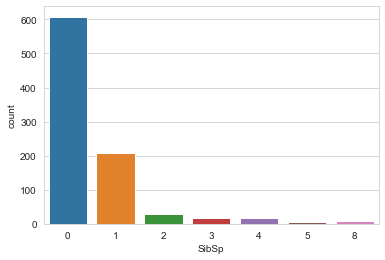

In [29]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

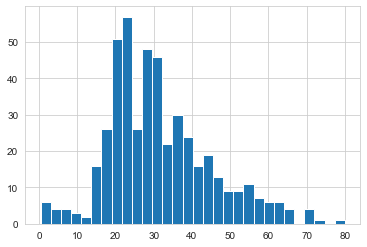

In [33]:
train[train['SibSp'] == 0]['Age'].hist(bins = 30)

In [ ]:
plt.figure(figsize=(10, 6))
train[train['Fare'] <70].hist(color='green' ,bins=50)